Thu Apr 14 16:27:01 +0000 2016
['RT', '@', 'csdhschn', ':', 'Today', ',', 'we', 'launch', '#', 'DiverseDH', ',', '&', 'amp', ';', 'we', 'are', 'asking', 'for', 'help', 'from', '#', 'digitalhumanities', 'folks', '!', 'Please', 'share', 'and', 'contribute', ':', 'https', ':', '//t.c…']
['RT', '@csdhschn', ':', 'Today', ',', 'we', 'launch', '#DiverseDH', ',', '&', 'amp', ';', 'we', 'are', 'asking', 'for', 'help', 'from', '#digitalhumanities', 'folks', '!', 'Please', 'share', 'and', 'contribute', ':', 'https://t.c', '…']
[(',', 26), (':', 24), ('we', 20), ('#DiverseDH', 18), ('!', 16)]
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
<class 'dict'>
[('#DiverseDH', 18), ('@csdhschn', 15), ('launch', 10), ('Today', 10), ('Please', 10)]


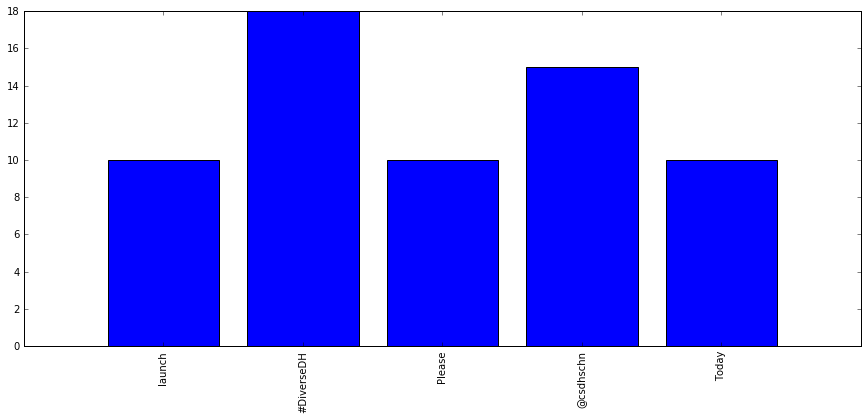

In [53]:
#Task Description: load a corpus of tweets and print a barplot of the most frequently used terms

#Open the file
inFile = open('tweets-0001.json')
#for line in inFile:
#    print(line)

#Load the data from the file into a variable
import json

line = inFile.readline() # read only the first tweet/line
tweet = json.loads(line) # load it as Python dict
# this print is nice for showing the content of a tweet
#print(json.dumps(tweet, indent=4)) # pretty-print

#Slice up the body text of the tweets
from nltk.tokenize import word_tokenize
 
#tweet = 'RT @marcobonzanini: just an example! :D http://example.com #NLP'
print(word_tokenize(tweet['text'])) # chops up the tweet.  this is done badly.

#Instantiate a text pre-processor
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
 
print(preprocess(tweet['text']))

#Count the terms
import operator 
import json
from collections import Counter
 
fname = 'tweets-0001.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_all = [term for term in preprocess(tweet['text'])]
        # Update the counter
        count_all.update(terms_all)
    # Print the first 5 most frequent words
    print(count_all.most_common(5))

#This gives us mostly junk though so we need to remove stopwords.
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
print(punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'RT', '…']

with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        # Update the counter
        count_all.update(terms_stop)
    # Print the first 5 most frequent words
    print (type(dict(count_all)))
    print(count_all.most_common(5))   
    
"""
# Count terms only once, equivalent to Document Frequency
terms_single = set(terms_all)
# Count hashtags only
terms_hash = [term for term in preprocess(tweet['text']) 
              if term.startswith('#')]
# Count terms only (no hashtags, no mentions)
terms_only = [term for term in preprocess(tweet['text']) 
    if term not in stop 
    and not term.startswith(('#', '@'))] 
    # mind the ((double brackets))
    # startswith() takes a tuple (not a list) if 
    # we pass a list of inputs
"""


#Produce the chart
# Print the current version of the chart
%matplotlib inline
count_all_dict = dict(count_all.most_common(5))
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.bar(range(len(count_all_dict)), count_all_dict.values(), align='center')
plt.xticks(range(len(count_all_dict)), list(count_all_dict.keys()),rotation='vertical')

plt.show()

#Close everything
inFile.close()